<a href="https://colab.research.google.com/github/pythience/Desafio3/blob/master/1_Desafio3_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafío 3: Intención de compradores en línea 

## Análisis Exploratorio de Datos


## 1. Introducción

**Información del DataSet:**

El dataset consiste en vectores de características que pertenecen a 12330 sesiones. 
El conjunto de datos se conformó de manera que cada sesión pertenezca a un usuario diferente en un período de 1 año para evitar cualquier tendencia a una campaña específica, día especial, perfil de usuario o período. 

El conjunto de datos original consta de 10 atributos numéricos y 8 atributos categóricos. 
El atributo *'Revenue'* (Ingresos) se utiliza como etiqueta de clasificación. 

*"Administrative"* (Administrativa), *"Administrative Duration"* (Duración administrativa), *"Informational"* (Informativa), *"Informational Duration"* (Duración informativa), *"Product Related"* (Producto relacionado) y *"Product Related Duration"* (Duración producto relacionado) representan el número de diferentes tipos de páginas visitadas por el visitante en esa sesión y el tiempo total invertido en cada una de estas categorías de páginas. Los valores de estas funciones se derivan de la información de URL de las páginas visitadas por el usuario y se actualizan en tiempo real cuando un usuario realiza una acción, por ejemplo: pasar de una página a otra. 

*Respecto a Google Analytics:*
Las características *"Bounce Rate"* (Tasa de rebote), *"Exit Rate"* (Tasa de salida) y ***"Page Value"* (Valor de la página)** representan las métricas medidas por "Google Analytics" para cada página en el sitio de comercio electrónico. El valor de la función "Índice de rebote" para una página web se refiere al porcentaje de visitantes que ingresan al sitio desde esa página y luego se van ("rebote") sin activar ninguna otra solicitud al servidor de análisis durante esa sesión. El valor de la columna "Tasa de salida" para una página web específica se calcula como el porcentaje del total de páginas en cada página fue la última en ser visitada en la sesión. La característica **"Valor de página"** representa el valor promedio de una página web que un usuario visitó antes de completar una transacción de comercio electrónico. 

*Otras características:*
La función "Día especial" indica la proximidad del tiempo de visita del sitio a un día especial específico (por ejemplo, el Día de la Madre, el Día de San Valentín) en el que es más probable que las sesiones finalicen con la compra. El valor de este atributo se determina considerando la dinámica del comercio electrónico, como la duración entre la fecha del pedido y la fecha de entrega. Por ejemplo, para el día de San Valentín, este valor toma un valor distinto de cero entre el 2 de febrero y el 12 de febrero, cero antes y después de esta fecha a menos que esté cerca de otro día especial, y su valor máximo de 1 el 8 de febrero. El conjunto de datos también incluye sistema operativo, navegador, región, tipo de tráfico, tipo de visitante como visitante recurrente o nuevo, un valor booleano que indica si la fecha de la visita es el fin de semana y el mes del año.

*Fuente: https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset*


In [0]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# para Anaconda:
path = ''

# para Cristian en Colab:
#path='gdrive/My Drive/DataScience - DH/Desafio3/'
# para Juan en Colab:
#path='gdrive/My Drive/Desafio3/'

In [0]:
# Importamos las librerías necesarias
#!pip install -U imbalanced-learn 

In [0]:
%pylab inline
import pandas as pd
import numpy as np
import seaborn as sns
from pylab import savefig
from imblearn.over_sampling import SMOTE


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
df = pd.read_csv('{}online_shoppers_intention.csv'.format(path))
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

In [0]:
revenue = [df.loc[df['Revenue'] == False].count()['Revenue'], df.loc[df['Revenue'] == True].sum()['Revenue']]
display(revenue)
display(revenue[1]/(revenue[0]+revenue[1]))
display(df.loc[df['Revenue'] == True].head())

[10422, 1908]

0.15474452554744525

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
65,3,87.833333,0,0.0,27,798.333333,0.000000,0.012644,22.916036,0.8,Feb,2,2,3,1,Returning_Visitor,False,True
76,10,1005.666667,0,0.0,36,2111.341667,0.004348,0.014493,11.439412,0.0,Feb,2,6,1,2,Returning_Visitor,False,True
101,4,61.000000,0,0.0,19,607.000000,0.000000,0.026984,17.535959,1.0,Feb,1,1,7,4,Returning_Visitor,True,True
188,9,111.500000,1,48.5,49,1868.819697,0.000000,0.020709,1.706015,0.0,Mar,2,2,7,2,Returning_Visitor,False,True
196,2,56.000000,1,144.0,67,2563.783333,0.000000,0.005797,19.342650,0.0,Mar,2,2,4,2,New_Visitor,False,True


In [0]:
#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sns
#import matplotlib.font_manager
#%matplotlib inline
#import plotly.plotly  as py
#import plotly.graph_objs as go


In [0]:
color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9',   
                      '#C1F0F6', '#0099CC']

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


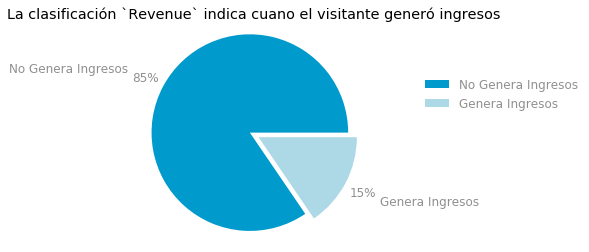

In [0]:
fig, ax = plt.subplots()
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#909090'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=12
labels = ['No Genera Ingresos', 
         'Genera Ingresos']
#percentages = [91, 9]
explode=(0.1,0)
ax.pie(revenue, explode=explode, labels=labels,  
       colors=color_palette_list[0:2], autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
ax.set_title("La clasificación `Revenue` indica cuano el visitante generó ingresos")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

**Nota:** el dataset se observa desbalanceado en casos de visitas con y sin compras. 1908 compras dentro de los 12330 registros de visitas.



---



Realizamos un gráfico exploratorio de los datos.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


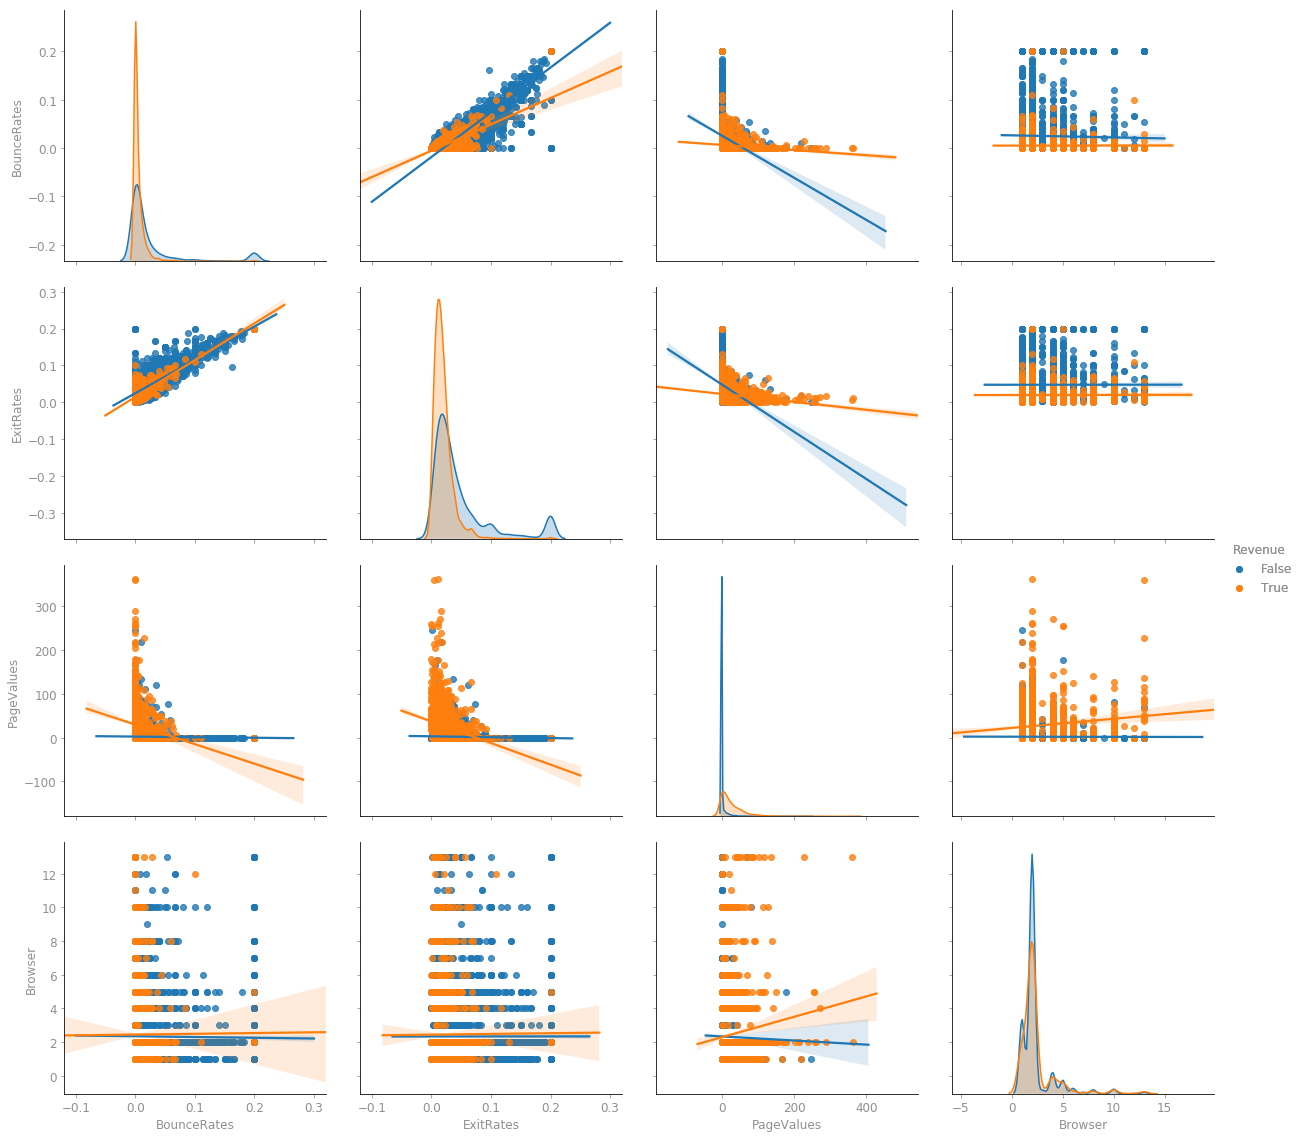

In [0]:
g = sns.pairplot(df,hue='Revenue',size=4,vars=["BounceRates", "ExitRates","PageValues","Browser"],kind='reg')
g.add_legend();
#g.plot()
g.savefig("{}features_pairplot.png".format(path), dpi=400)

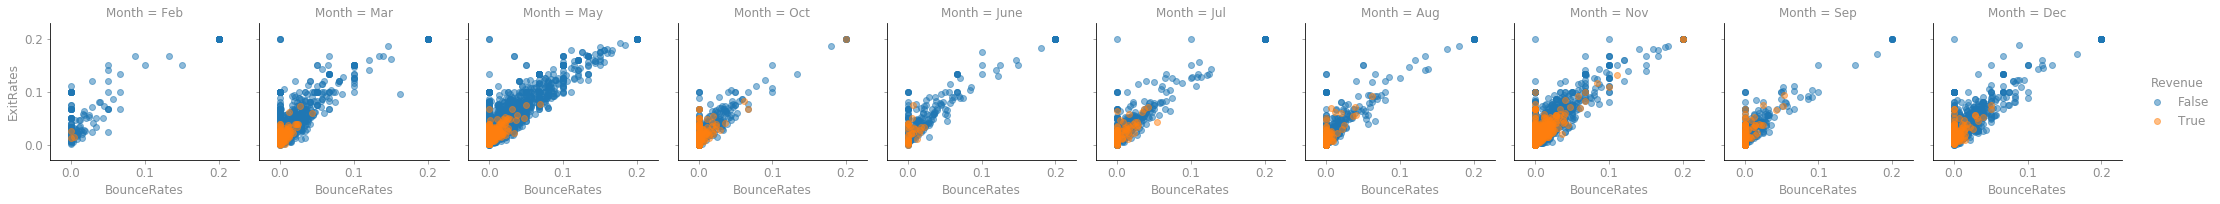

In [0]:
g = sns.FacetGrid(df, col="Month", hue="Revenue")
g.map(plt.scatter, "BounceRates", "ExitRates", alpha=.5)
g.add_legend();
#g.plot()
g.savefig("{}features_scatter.png".format(path), dpi=400)

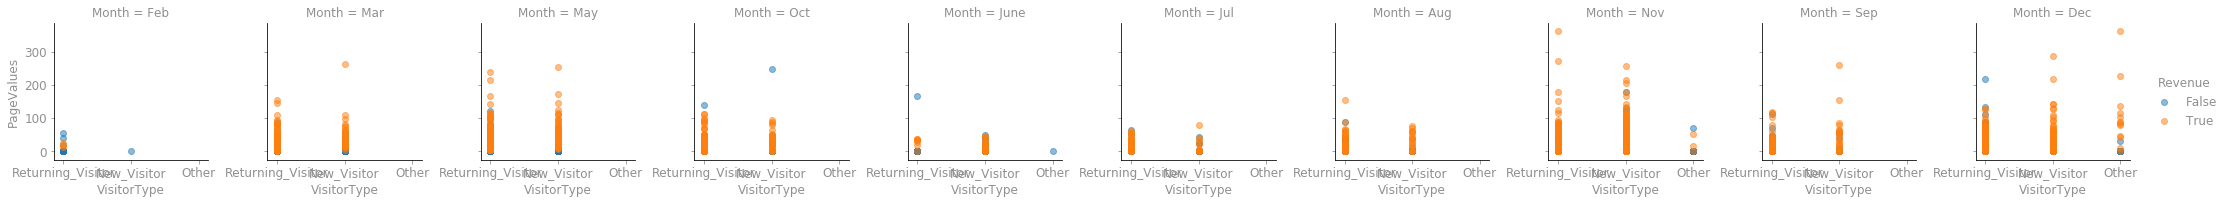

In [0]:
g = sns.FacetGrid(df, col="Month", hue="Revenue")
g.map(plt.scatter, "VisitorType", "PageValues", alpha=.5)
g.add_legend();
#g.plot()
g.savefig("{}features_scatter_2.png".format(path), dpi=400)

#### Comenzamos a transformar las features categóricas en numéricas para poder aplicar a gráficos y modelo.

Aplicamos get_dummies a las columnas 'VisitorType' y 'Weekend'


In [0]:
print(df.VisitorType.unique())
print(df.Weekend.unique())

['Returning_Visitor' 'New_Visitor' 'Other']
[False  True]


In [0]:
df = df.join(pd.get_dummies(df.pop('VisitorType')))
df = df.join(pd.get_dummies(df.pop('Weekend'), prefix='Weekend'))

display(df.head())

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Revenue,New_Visitor,Other,Returning_Visitor,Weekend_False,Weekend_True
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,False,0,0,1,1,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,False,0,0,1,1,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,False,0,0,1,1,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,False,0,0,1,1,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,False,0,0,1,0,1




La extracción de features dummies se puede reducir en una dimensión para cada feature convertida a dummy.

In [0]:
# La extracción de features dummies se puede reducir en una dimensión para cada feature convertida a dummy.
df.drop(['Other', 'Weekend_False'], inplace=True, axis=1)

##### Para Month y Revenue aplicamos otra técnica para convertir las features categoricas.

In [0]:
df.Month.unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [0]:
# creamos la lista de valores para meses  
month = {'Jan':1, 'Feb': 2, 'Mar': 3, 'Apr':4, 'May': 5, 'June': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12} 
# creamos la lista de valores para Revenue  
revenue = {True:1, False: 0} 
  
# aplicamos estos valores en la columna Month y Revenue
# donde los textos coincidan. 
df.Month = [month[item] for item in df.Month] 
df.Revenue = [revenue[item] for item in df.Revenue] 

display(df.Month.unique())
display(df.Revenue.unique())
display(df.head())

array([ 2,  3,  5, 10,  6,  7,  8, 11,  9, 12])

array([0, 1])

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Revenue,New_Visitor,Returning_Visitor,Weekend_True
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,0,0,1,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,0,0,1,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,0,0,1,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,0,0,1,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,0,0,1,1


Separamos las columnas numéricas para poder plotear.

In [0]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Revenue',
       'New_Visitor', 'Returning_Visitor', 'Weekend_True'],
      dtype='object')

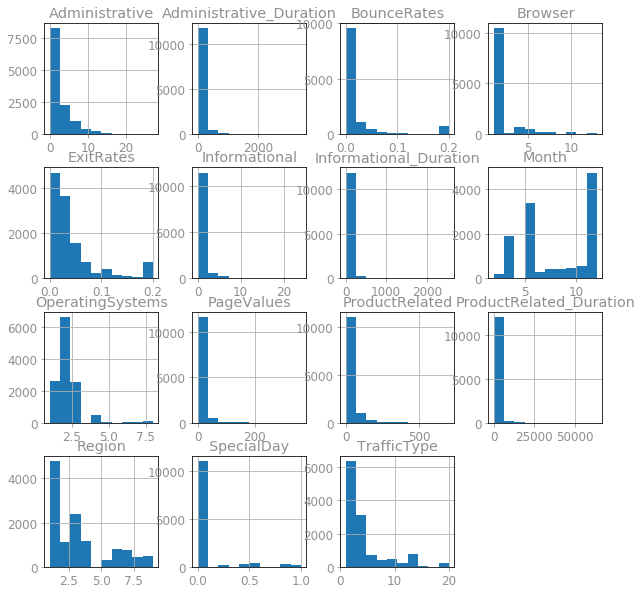

In [0]:
df_plot = df[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 
       'OperatingSystems', 'Browser', 'Region', 'TrafficType']]
fig=df_plot.hist(figsize=(10,10))    #.gcf().savefig("{}features_histogram.png".format(path), dpi=400)

Realicemos, ahora, un análisis gráfico exploratorio de la relación entre features:

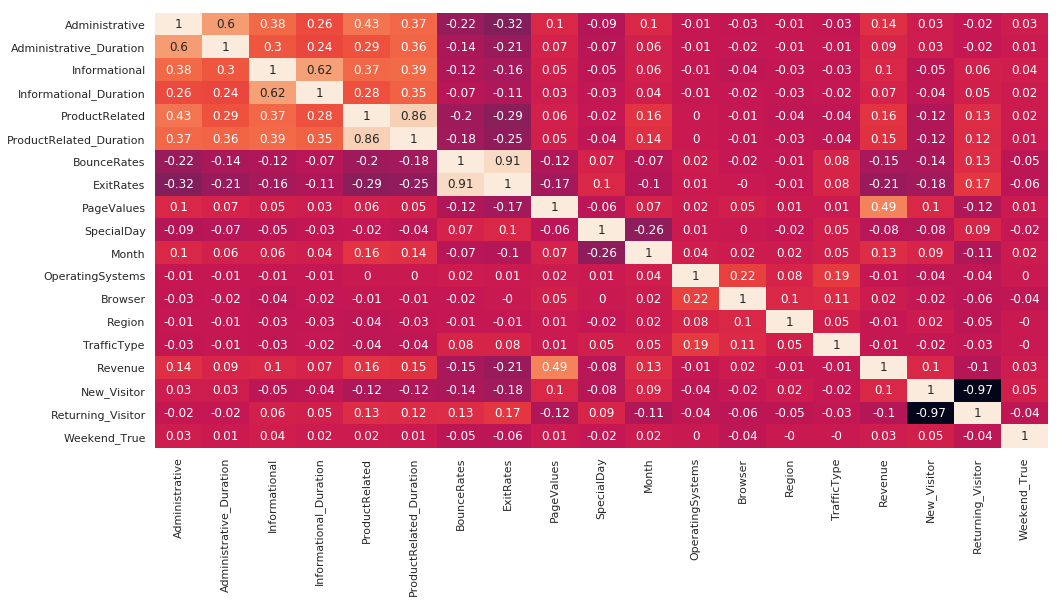

In [0]:
sns.set(rc={'figure.figsize':(16,8)})
# Usamos todas las features para un heatmap
sns_hm=sns.heatmap(df.corr().round(2),annot=True, cbar=False)
sns_hm.plot()
fig = sns_hm.get_figure()
fig.savefig("{}features_heatmap.png".format(path), dpi=400)

#### Antes de comenzar con la extracción de features y target, vamos a preservar el dataframe.

In [0]:
import pickle

In [0]:
with open('{}online_shoppers_intention_dummies.pkl'.format(path), 'wb') as df_pkl:
    pickle.dump(df, df_pkl)



---



---

